In [30]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
latency_cols = ["start", "end", "id", "start_ts", "arrival"]
ref_col = "start_ts"

waitTime = "100"
loc = "datasets/NES/171123/1sec_100_1_3w_p_oc"

bottom_up_no_stress_dir_monitoring = loc + "/bottom_up_no_4x800M_100.csv"
bottom_up_stress_dir_monitoring = loc + "/bottom_up_all_4x800M_100.csv"

top_down_no_stress_dir_monitoring = loc + "/top_down_no_4x800M_100.csv"
top_down_stress_dir_monitoring = loc + "/top_down_all_4x800M_100.csv"

nemo_no_stress_dir_monitoring = loc + "/nemo_no_4x800M_100.csv"
nemo_stress_dir_monitoring = loc + "/nemo_all_4x800M_100.csv"

mst_no_stress_dir_monitoring = loc + "/bottomUpWithMonitoringSourceMst/bottomUpWithMonitoringSourceMst.out"
mst_stress_dir_monitoring = loc + "/bottomUpWithMonitoringSourceMst_stressed/bottomUpWithMonitoringSourceMst.out"

chain_no_stress_dir_monitoring = loc + "/bottomUpWithMonitoringSourceChain/bottomUpWithMonitoringSourceChain.out"
chain_stress_dir_monitoring = loc + "/bottomUpWithMonitoringSourceChain_stressed/bottomUpWithMonitoringSourceChain.out"

bottom_up_no_stress_dir_debs = loc + "/bottomUpDebsThreeLevel/bottomUpDebsThreeLevel.out"
top_down_no_stress_dir_debs = loc + "/topDownDebsThreeLevel/topDownDebsThreeLevel.out"
nemo_no_stress_dir_debs = loc + "/nemoDebsThreeLevel/nemoDebsThreeLevel.out"

bottom_up_stress_dir_debs = loc + "/bottomUpDebsThreeLevel_stress/bottomUpDebsThreeLevel.out"
top_down_stress_dir_debs = loc + "/topDownDebsThreeLevel_stress/topDownDebsThreeLevel.out"
nemo_stress_dir_debs = loc + "/nemoDebsThreeLevel_stress/nemoDebsThreeLevel.out"

measurements = {
    #"mst": mst_no_stress_dir,
    #"mst stress": mst_stress_dir,
    #"chain": chain_no_stress_dir,
    #"chain stress": chain_stress_dir,
    #"top-down": top_down_no_stress_dir_debs,
    #"top-down stress": top_down_stress_dir_debs,
    "bottom-up": bottom_up_no_stress_dir_debs,
    "bottom-up stress": bottom_up_stress_dir_debs,
    "nemo": nemo_no_stress_dir_debs,
    "nemo stress": nemo_stress_dir_debs
}

color_list = sns.color_palette(n_colors=len(measurements))
color_dict = {}
i = 0
for k in measurements.keys():
    color_dict[k] = color_list[i]
    i = i + 1

# this dict contains the latency measurements of each approach
latency_results = {}
runtimes = {}

## Latency

In [32]:
for k, m_loc in measurements.items():
    print(k, m_loc)
    df = pd.read_csv(m_loc, skiprows=1, names=latency_cols)
    df["latency"] = df["arrival"] - df["start_ts"]
    # df = df[df["latency"] > 0]
    print(df[df["latency"] <= 0]["latency"].count())
    latencies = df["latency"].to_list()
    latency_results[k] = latencies
    runtimes[k] = df["arrival"].max() - df["start_ts"].min()

bottom-up datasets/NES/171123/1sec_100_1_3w_p_oc/bottomUpDebsThreeLevel/bottomUpDebsThreeLevel.out
0
bottom-up stress datasets/NES/171123/1sec_100_1_3w_p_oc/bottomUpDebsThreeLevel_stress/bottomUpDebsThreeLevel.out
0
nemo datasets/NES/171123/1sec_100_1_3w_p_oc/nemoDebsThreeLevel/nemoDebsThreeLevel.out
0
nemo stress datasets/NES/171123/1sec_100_1_3w_p_oc/nemoDebsThreeLevel_stress/nemoDebsThreeLevel.out
0


In [33]:
df

,start,end,id,start_ts,arrival,latency
0,10634000,10635000,54,1700233651288,1700233655384,4096
1,10634000,10635000,63,1700233651222,1700233655384,4162
2,10634000,10635000,13,1700233651204,1700233655807,4603
3,10634000,10635000,100,1700233651241,1700233655807,4566
4,10634000,10635000,24,1700233651261,1700233656581,5320
...,...,...,...,...,...,...
81,10647000,10648000,47,1700233909090,1700233934522,25432
82,10647000,10648000,13,1700233920168,1700233942278,22110
83,10647000,10648000,100,1700233891545,1700233942278,50733
84,10648000,10649000,54,1700233921276,1700233943856,22580


In [34]:
runtimes

{'bottom-up': 299586,
 'bottom-up stress': 299970,
 'nemo': 292506,
 'nemo stress': 292652}

bottom-up 89
bottom-up stress 89
nemo 86
nemo stress 86


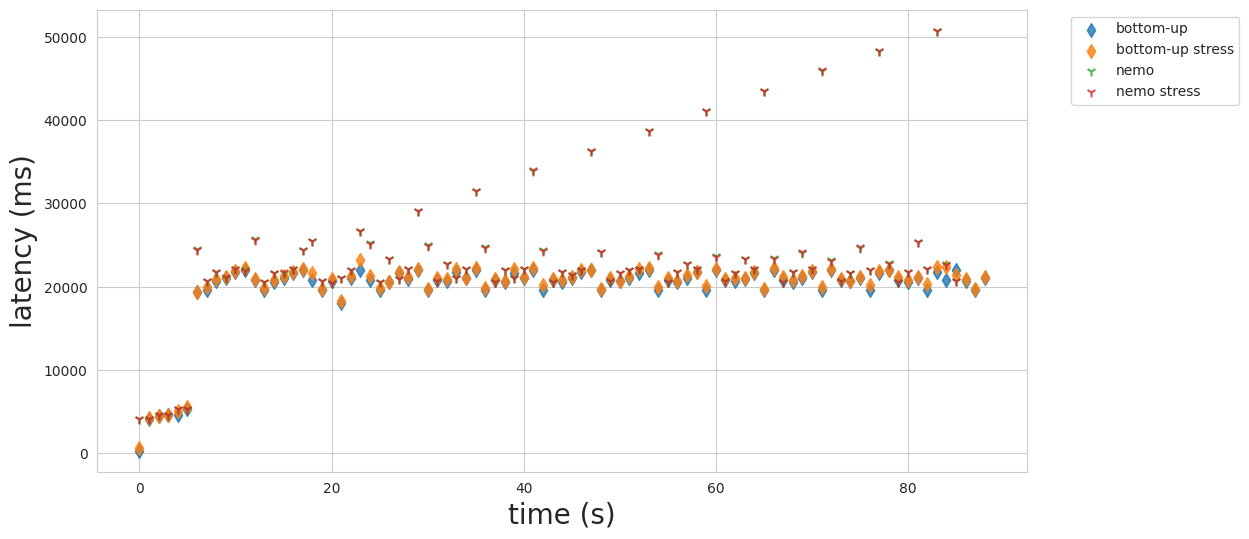

In [35]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(12, 6))
min_ns = sys.maxsize
min_s = sys.maxsize

i = 1
for k, v in latency_results.items():
    print(k, len(v))
    if k.endswith("stress"):
        if len(v) < min_s:
            min_s = len(v)
    else:
        if len(v) < min_ns:
            min_ns = len(v)

    if k.startswith("nemo"):
        marker = "1"
    elif k.startswith("bottom"):
        marker = "d"
    else:
        marker = "v"

    ax.scatter([i for i in range(len(v))], v, label=k, s=50, alpha=0.8, marker=marker, color=color_dict[k])
    i = i + 1

# set the axis labels and title
plt.xlabel('time (s)', fontsize=20)
plt.ylabel('latency (ms)', fontsize=20)

# Set the legend
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

# show the plot
# plt.title('Latency/tuple (80 events/s)')
plt.show()

In [36]:
# normalize
norm_latency_results = {}

for k, v in latency_results.items():
    if k.endswith("stress"):
        norm_latency_results[k] = v[:min_s]
    else:
        norm_latency_results[k] = v[:min_ns]

bottom-up 86
bottom-up stress 86
nemo 86
nemo stress 86


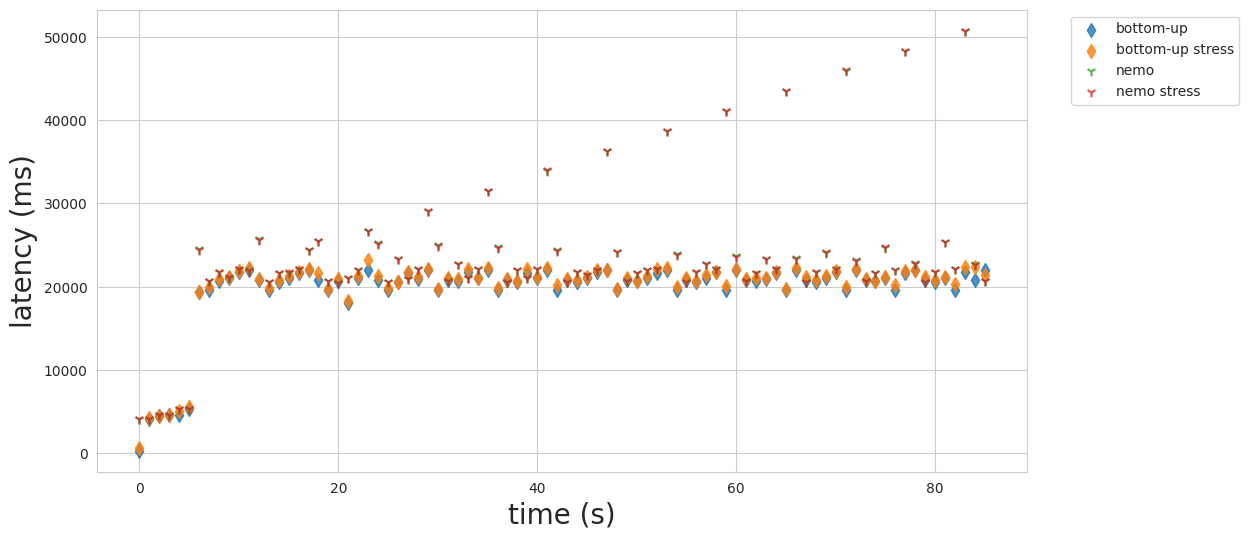

In [37]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(12, 6))

i = 1
for k, v in norm_latency_results.items():
    print(k, len(v))

    if k.startswith("nemo"):
        marker = "1"
    elif k.startswith("bottom"):
        marker = "d"
    else:
        marker = "v"

    ax.scatter([i for i in range(len(v))], v, label=k, s=50, alpha=0.8, marker=marker, color=color_dict[k])
    i = i + 1

# set the axis labels and title
plt.xlabel('time (s)', fontsize=20)
plt.ylabel('latency (ms)', fontsize=20)

# Set the legend
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

# show the plot
# plt.title('Latency/tuple (80 events/s)')
plt.show()

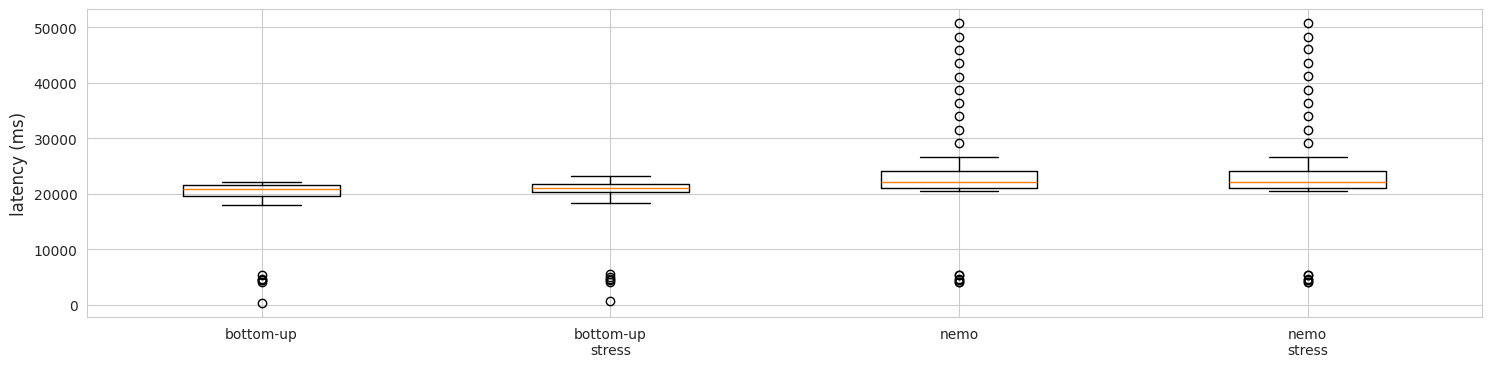

In [38]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(18, 4))

# Extract the keys and values from the measurements dictionary
labels = latency_results.keys()
values = latency_results.values()

# Create the box plots for each key-value pair
ax.boxplot(values)

# Format x-tick labels with line breaks for the second word after a space
formatted_labels = [label.replace(' ', '\n', 1) for label in labels]
ax.set_xticklabels(formatted_labels)

# Set the title
plt.ylabel('latency (ms)', fontsize=12)

plt.savefig("plots/NES/latency_boxplot.svg", bbox_inches="tight")

# Display the plot
# plt.title("Latency (wait_time={0}ms)".format(waitTime))
plt.show()

## normalized

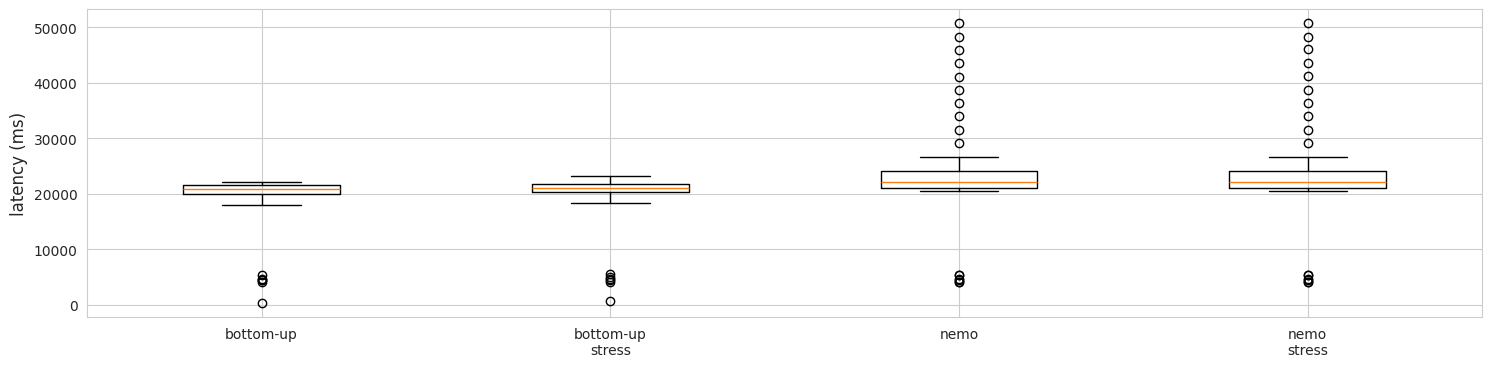

In [39]:
# Create a figure and axes for the box plots
fig, ax = plt.subplots(figsize=(18, 4))

# Extract the keys and values from the measurements dictionary
labels = norm_latency_results.keys()
values = norm_latency_results.values()

# Create the box plots for each key-value pair
ax.boxplot(values)

# Format x-tick labels with line breaks for the second word after a space
formatted_labels = [label.replace(' ', '\n', 1) for label in labels]
ax.set_xticklabels(formatted_labels)

# Set the title
plt.ylabel('latency (ms)', fontsize=12)

plt.savefig("plots/NES/latency_boxplot.svg", bbox_inches="tight")

# Display the plot
# plt.title("Latency (wait_time={0}ms)".format(waitTime))
plt.show()

In [40]:
percentiles = [85, 90, 95, 99]
approaches = []
values = []
perc_label = []

for k, v in latency_results.items():
    #if "top-down" in k:
    #    continue
    for pval in percentiles:
        perc = np.percentile(v, pval).round(2)
        approaches.append(k)
        values.append(perc)
        perc_label.append(pval)

df_dict = dict(approach=approaches, value=values, percentile=perc_label)
df = pd.DataFrame(df_dict)

In [41]:
df

,approach,value,percentile
0,bottom-up,21764.80,85
1,bottom-up,22061.20,90
2,bottom-up,22065.60,95
3,bottom-up,22067.24,99
4,bottom-up stress,22122.00,85
5,bottom-up stress,22155.80,90
6,bottom-up stress,22310.60,95
7,bottom-up stress,22495.60,99
8,nemo,25422.25,85
9,nemo,30324.50,90


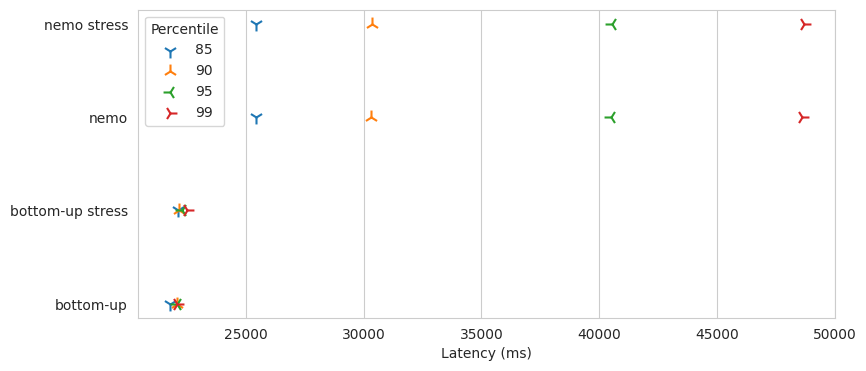

In [42]:
# Create the dot plot using matplotlib
fig, ax = plt.subplots(figsize=(9, 4))
color_list = sns.color_palette(n_colors=len(percentiles))
i = 0
for perc in percentiles:
    mask = df["percentile"] == perc
    ax.scatter(df.loc[mask, "value"], df.loc[mask, "approach"], color=color_list[i], label=str(perc), marker=str(i + 1),
               s=100)
    i = i + 1

ax.set_xlabel("Latency (ms)")
ax.legend(title="Percentile")
ax.grid(axis='y')

plt.show()

In [43]:
percentiles = [85, 90, 95, 99]
value_dict = {}

for k, v in latency_results.items():
    values = []
    for pval in percentiles:
        perc = np.percentile(v, pval).round(2)
        values.append(perc)
    value_dict[k] = values

df = pd.DataFrame.from_dict(value_dict, columns=percentiles, orient='index').astype(int)
df

,85,90,95,99
bottom-up,21764,22061,22065,22067
bottom-up stress,22122,22155,22310,22495
nemo,25422,30324,40493,48606
nemo stress,25437,30335,40529,48669


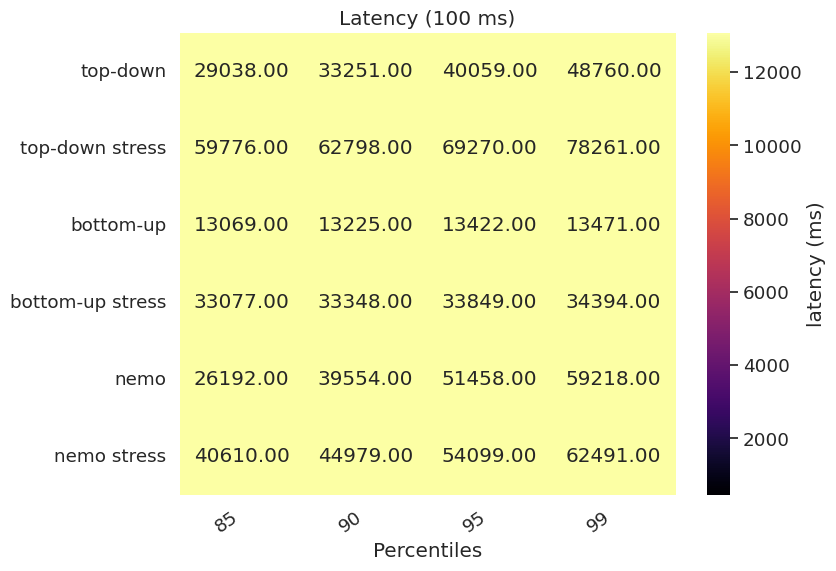

In [49]:
# create the heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(df, annot=True, cmap='inferno', vmax=500, cbar_kws={'label': 'latency (ms)'}, cbar=True, fmt='.2f')

# Rotate xtick labels
plt.xticks(rotation=35, ha='right')
plt.xlabel("Percentiles")
# show the plot
plt.savefig("plots/NES/latency_heatmap_perc.svg", bbox_inches='tight')
plt.title("Latency ({0} ms)".format(waitTime))
plt.show()